# Dataset: Google Play Store Apps data set
### Objective:
Dive into the world of apps on the Google Play Store! I will uncover interesting facts and patterns about the apps available on the Google Play Store using data analysis techniques. I'll be working with a dataset that includes details like App name, category, rating, reviews, size, installs, type, price, content rating, and genres.

# Questions:
Question 1:
- Which App Categories Are Most Popular? Look at which types of apps (like games or education) are more common.
Question 2:
- Do More Reviews Mean Better Ratings? See if apps with lots of reviews tend to have higher ratings.
Question 3:
- Free vs. Paid Apps: Compare how many apps are free versus paid, and see if there's a trend in different app categories.

# Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
df = pd.read_csv('./Data/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Finding answer of 1st question:

In [6]:
# Check the available app categories
categories = df['Category'].unique()

In [7]:
print(f"So there are total",df['Category'].nunique(),"categories.", "Which are given below:\n", df['Category'].unique())

So there are total 34 categories. Which are given below:
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [8]:
# Count the number of apps in each category
app_counts = df['Category'].value_counts()
print(app_counts)

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64


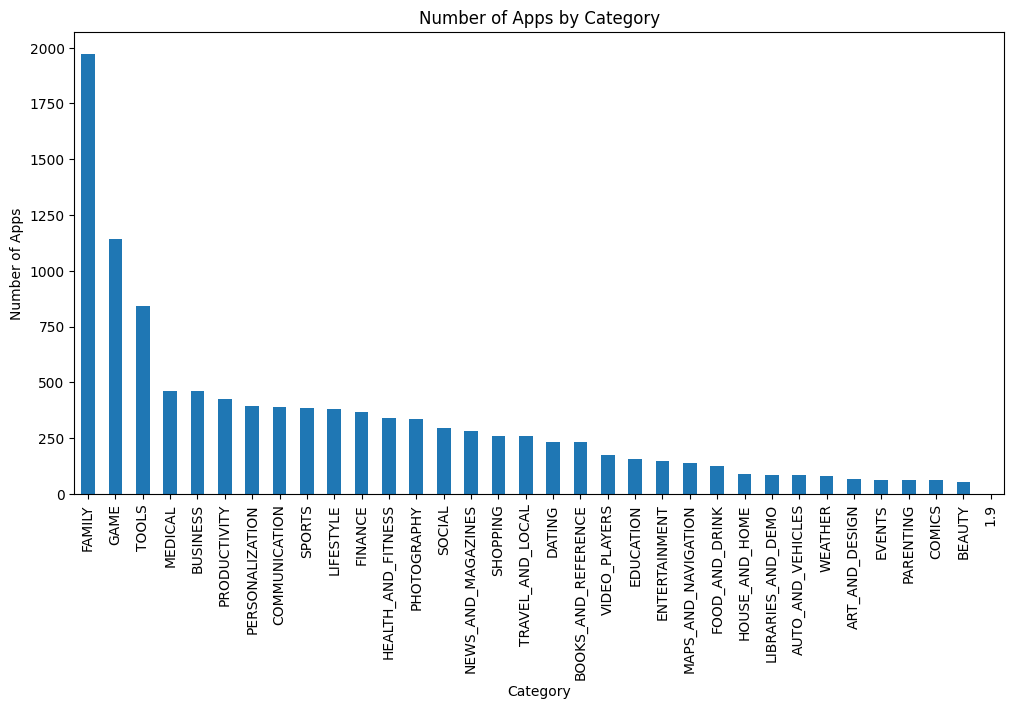

In [9]:
# Plot the app counts by category
plt.figure(figsize=(12, 6))
app_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps by Category')
plt.xticks(rotation=90)
plt.show()

### Answer of 1st question:
Family category is most popular a/c to the graph

# Finding Answer of 3rd question:

In [10]:
# Check for missing values
df[['Reviews', 'Rating']].isnull().sum()
# removing missing values
filter_df = df[['Reviews', 'Rating']].dropna()
# Delete row with "3.0M" in the review column
filter_df = filter_df[filter_df['Reviews'] != '3.0M']
# Convert the 'Reviews' column to integer type
filter_df['Reviews'] = pd.to_numeric(filter_df['Reviews'])

In [11]:
average_ratings = filter_df.groupby('Reviews')['Rating'].mean().reset_index()

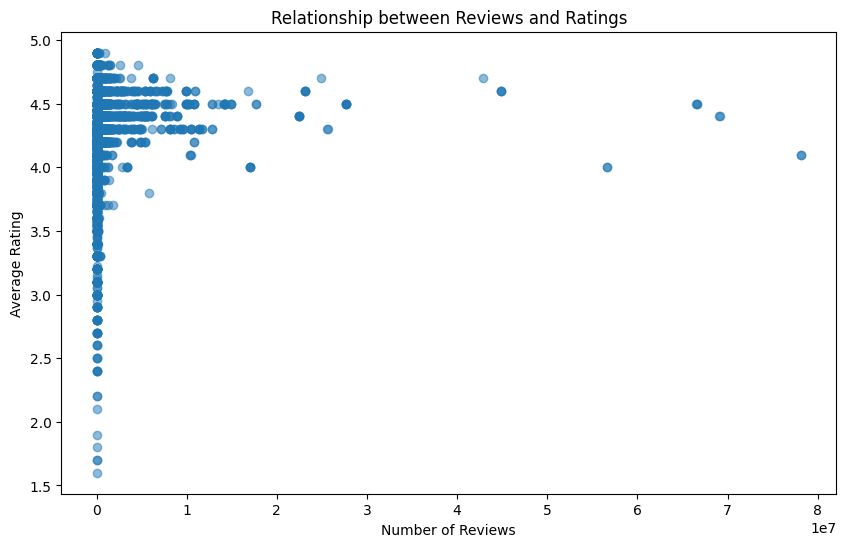

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(average_ratings['Reviews'], average_ratings['Rating'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.title('Relationship between Reviews and Ratings')
plt.show()

### Answer of 2nd question:
So, its clear from above plot higher the number of reviews better the ratings are. both are highly correlated

# Finding answer of 3rd question:

In [79]:
# As Price was an object, we need to convert it to numeric type
df['Price'] = df['Price'].replace('Everyone', '').replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].max()

400.0

In [75]:
filtered_df = df[['Category', 'Price']]

In [83]:
# Binnig the price column
bins = [-1, 0, 10, 100, 401]
labels = ['Free', 'Cheap','Average', 'Expensive']
filtered_df['Price Category'] = pd.cut(filtered_df['Price'], bins=bins, labels=labels)

C:\Users\Asim Mehdi\AppData\Local\Temp\ipykernel_6636\1967108383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Price Category'] = pd.cut(filtered_df['Price'], bins=bins, labels=labels)


In [84]:
grouped_df = filtered_df.groupby(['Category', 'Price Category']).size().unstack()

C:\Users\Asim Mehdi\AppData\Local\Temp\ipykernel_6636\2322157239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.groupby(['Category', 'Price Category']).size().unstack()


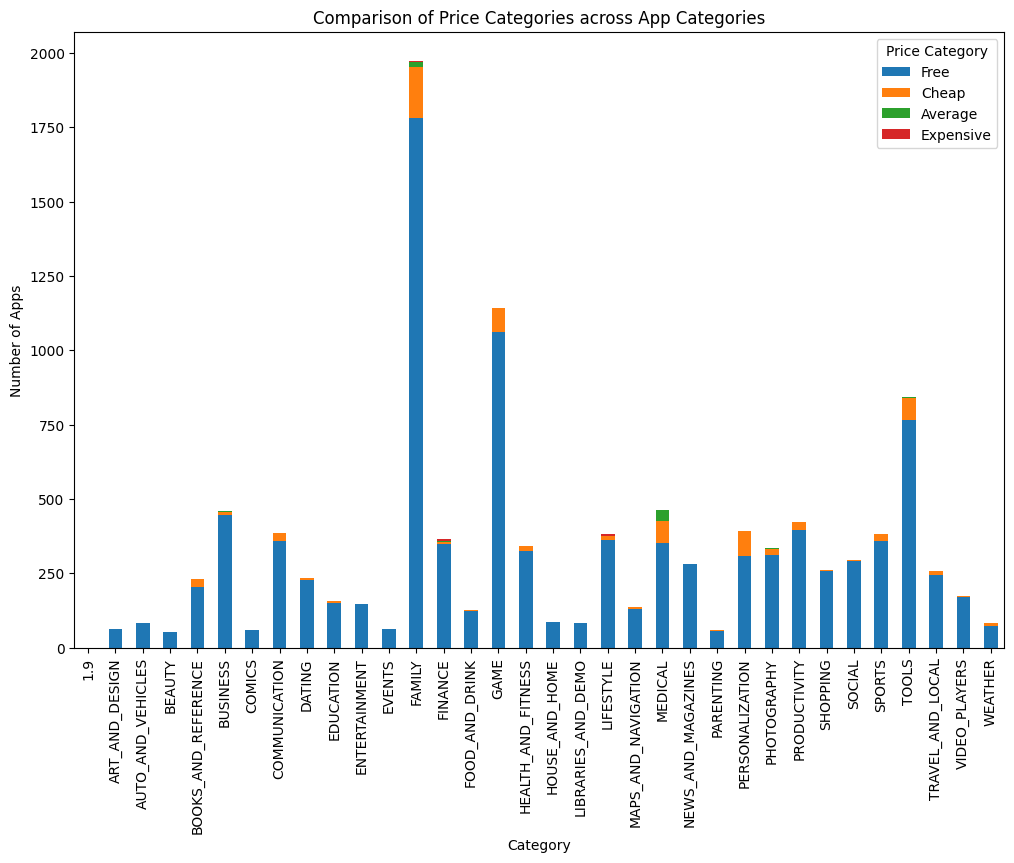

In [89]:
grouped_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Comparison of Price Categories across App Categories')
plt.legend(title='Price Category', loc='upper right')
plt.show()

# Answer of 3rd question:
So the graph is showing most apps are free in all categories. After free apps the second most appearing apps are the cheap ones ranging form 0 to 10 dollars.